# Constraints on Melody in Pindar’s Odes

# Barys

[[[[0.15384615384615385, 0.0, 0.46153846153846156, 2.3076923076923075, 0.9230769230769231, 0.0, 0.0, 0.46153846153846156, 0.0, 0.0, 3.230769230769231], [0.9230769230769231, 0.0, 0.9230769230769231, 1.5384615384615385, 3.230769230769231, 0.0, 0.0, 2.3076923076923075, 0.0, 0.0, 5.538461538461538, 0.0, 5.538461538461538, 0.0, 0.0, 4.3076923076923075, 1.5384615384615385, 0.0, 0.0, 1.5384615384615385, 0.0, 0.0, 5.538461538461538], [0.15384615384615385, 0.0, 0.0, 0.9230769230769231, 4.3076923076923075, 0.0, 0.0, 0.9230769230769231, 0.0, 0.0, 1.5384615384615385, 0.0, 8.461538461538462, 0.0, 0.46153846153846156, 3.230769230769231, 3.230769230769231, 0.0, 0.0, 6.923076923076923], [0.46153846153846156, 0.0, 0.0, 1.5384615384615385, 0.0, 0.0, 0.9230769230769231, 0.0, 0.0, 1.5384615384615385, 0.15384615384615385, 8.461538461538462, 0.0, 0.46153846153846156, 6.923076923076923], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15384615384615385, 1.5384615384615385, 5.538461538461538, 0.0, 0.46153846153846156, 1.538

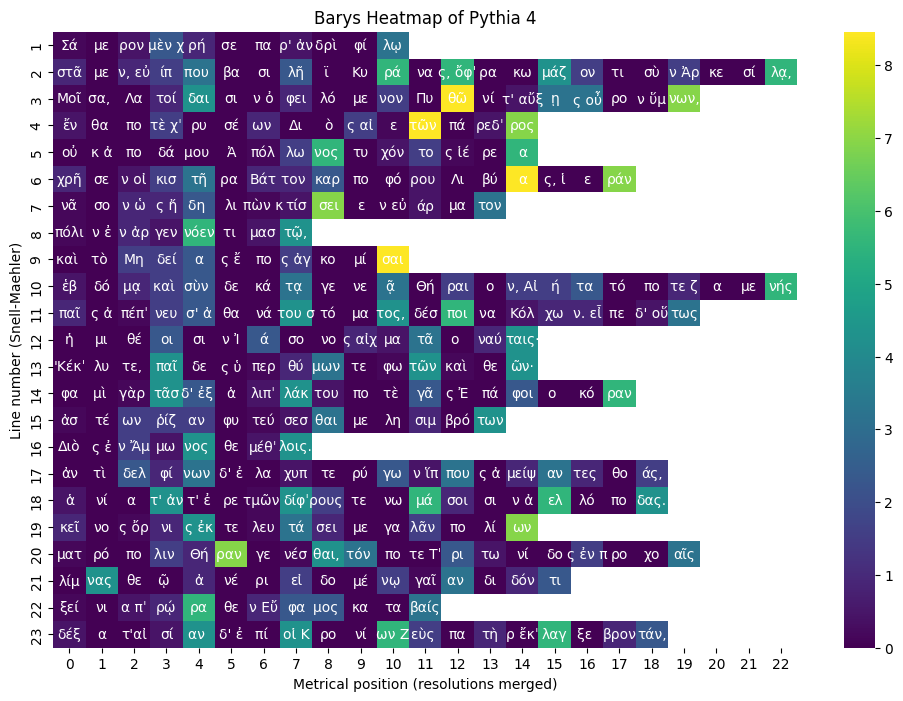

In [9]:
from src.stats_barys_float import float_barys_corpus

dir = "data/compiled/"
float_corpus = float_barys_corpus(dir)
print(float_corpus)

# -----------------------------

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = float_corpus

# Unwrap nested tensor structure (since just one song, redundant cantica and play dims)
data_matrix = data[0][0]

# -----------------------------
# 3. Shape check
# -----------------------------
num_rows_text = len(text_matrix)
num_rows_data = len(data_matrix)

if num_rows_text != num_rows_data:
    raise ValueError(f"Number of rows mismatch: text_matrix={num_rows_text}, data_matrix={num_rows_data}")

max_len_text = max(len(row) for row in text_matrix)
max_len_data = max(len(row) for row in data_matrix)

if max_len_text != max_len_data:
    raise ValueError(f"Row length mismatch: max text length={max_len_text}, max data length={max_len_data}")

# -----------------------------
# 4. Pad numeric matrix for heatmap
# -----------------------------
max_len = max_len_data
padded_data = np.full((len(data_matrix), max_len), np.nan)
for i, row in enumerate(data_matrix):
    padded_data[i, :len(row)] = row

# -----------------------------
# 5. Plot heatmap with text overlay
# -----------------------------
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    padded_data, 
    cmap="viridis", 
    mask=np.isnan(padded_data), 
    cbar=True
)

# Overlay text
for i, row in enumerate(text_matrix):
    for j, val in enumerate(row):
        ax.text(
            j + 0.5, i + 0.5,  # center in cell
            val,
            ha='center', va='center',
            color='white', fontsize=10
        )

plt.xlabel("Metrical position (resolutions merged)")
plt.ylabel("Line number (Snell-Maehler)")
plt.title("Barys Heatmap of Pythia 4")
plt.yticks(ticks=np.arange(len(data_matrix)) + 0.5, labels=np.arange(1, len(data_matrix)+1))

plt.savefig("media/plots/heatmap_pythia_4_barys.png", dpi=400) # add arg bbox_inches='tight' to make it tight
plt.show()

Tetrameter 3-strophes barys **baseline**: 0.15

Första 3 strofer i Pythia 4, barys: 0.25

Första 4, barys: 0.092

In [10]:
from src.stats_barys import barys_oxys_metric_corpus

corpus_dict = barys_oxys_metric_corpus('data/compiled', exclude_substr='baseline')

for key, value in corpus_dict.items():
    print(f'\t{key}: {value}')

Total barys match groups in corpus: 0
	barys_metric: 0.0
	oxys_metric: 0.0
	barys_oxys_metric: 0.0


In [11]:
from lxml import etree

from src.stats_barys import barys_accentually_responding_syllables_of_strophes_polystrophic, barys_detailed_print, count_all_barys_oxys_canticum

from src.utils.utils import polystrophic_cantica

barys_detailed_print("data/compiled/test/fourth_pythian_3_strophes.xml", ["py04"])


Canticum: py04
{'barys': 261, 'oxys': 91}
Barys match groups: 22
Barys metric: 0.253
Oxys metric:  0.033
Barys + Oxys metric: 0.196

--- BARYS MATCHES ---
  Match #1:
    (line 2, ord=5) => "ίππου "
    (line 25, ord=5) => "νάντω"
    (line 48, ord=5) => "κείνα^ν "

  Match #2:
    (line 3, ord=13) => "θῶ"
    (line 26, ord=13) => "νώτω"
    (line 49, ord=13) => "γείου "

  Match #3:
    (line 3, ord=20) => "ν ὕμνων,"
    (line 26, ord=20) => "ρήμων"
    (line 49, ord=20) => "νᾶν."

  Match #4:
    (line 4, ord=12) => "τῶν "
    (line 27, ord=12) => "σπάσσαν"
    (line 50, ord=12) => "ρήσει "

  Match #5:
    (line 6, ord=5) => "τῆ"
    (line 29, ord=5) => "δοίου π"
    (line 52, ord=5) => "θόντες "

  Match #6:
    (line 6, ord=15) => "βύα"
    (line 29, ord=15) => "λίων "
    (line 52, ord=15) => "φέων "

  Match #7:
    (line 7, ord=9) => "τίσσει"
    (line 30, ord=9) => "θόντεσ"
    (line 53, ord=9) => "ρύσῳ "

  Match #8:
    (line 9, ord=11) => "μίσαι"
    (line 32, ord=11) => "